# Testing our first LSTM text generation model

Here we'll recreate the same network that we trained our entire YelpNYC dataset on, load in the best weights, and actually generate some reviews!

In [1]:
import keras
from keras import layers
import sys
import numpy as np

chars=['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
char_indices = dict((char, chars.index(char)) for char in chars)
maxlen=60
step=1

model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars)),return_sequences=True))
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.load_weights("Mar-4-all-01-1.0843.hdf5")

optimizer = keras.optimizers.Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


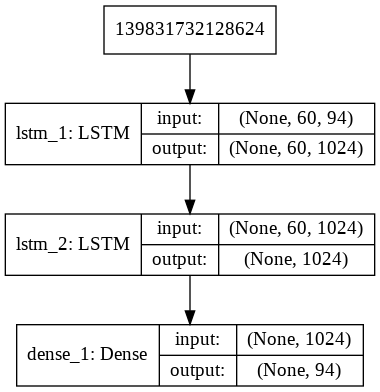

In [2]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png')

In [0]:
def sample(preds, temperature=1.0):
    '''
    Generate some randomness with the given preds
    which is a list of numbers, if the temperature
    is very small, it will always pick the index
    with highest pred value
    '''
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def random_reviews():
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]

    for temperature in [0.1, 0.3, 0.5, 0.8, 1.0]:
        print('Temperature: ', temperature)
        sys.stdout.write(generated_text)
        for i in range(1000):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]
            generated_text += next_char
            generated_text = generated_text[1:]
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print(generated_text)

In [9]:
text = 'This is a starter seed. The program will pick a random place in this sentence to start from, and then begin predicting the next character.'
random_reviews()


Temperature:  0.1
will pick a random place in this sentence to start from, and the food is great. \302\240I had the chicken and cheese and cheese and cheese and cheese and cheese and cheese and sandwiches are a little small and the service was great and the service is always great. \302\240I had the pizza and the service was great and the service was great. \302\240I will be back again.\n"
0 "I love the food and service was great and the service is great. \302\240I will be back again.\n"
0 "The food is great and the service was great. The service is great and the service is great. The service is great and the service was great and the service was great. The service is always great and the service is always great. The service is always great and the service was great. \302\240I had the chicken and cheese and cheese and cheese and cheese and cheese and cheese and cheese sandwiches are a little so good. \302\240I will be back again.\n"
0 "I love the food and service was great and the serv